### Лабораторная работа № 6
### Шамсутдинов Рустам БВТ2201

### Exercise 1

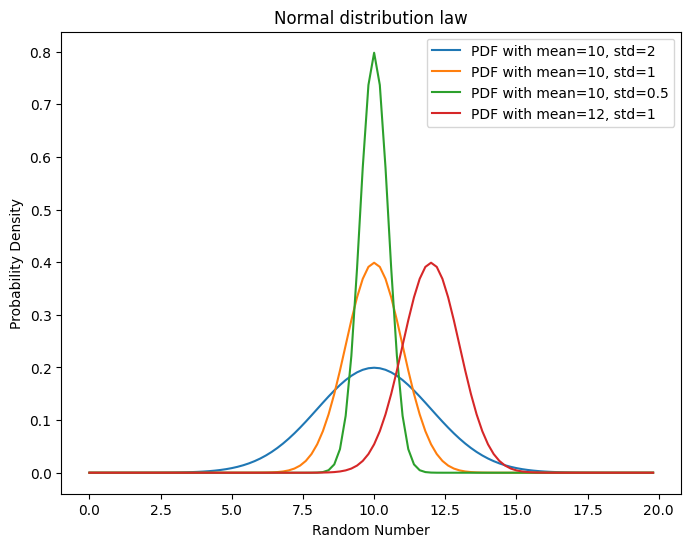

In [ ]:
import math
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np

# Define standard deviations and expectations
exp_values = [10, 10, 10, 12]
std_values = [2, 1, 0.5, 1]



# PDF function
def normal_pdf(x, m, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - m) / sigma)**2)



def normal_dis_function(std, expectation, x):
    part_1 = 1 / (std * (math.sqrt(2 * math.pi)))  # standard deviation
    part_2 = math.exp((-1 / 2) * (((x - expectation) / std) ** 2))  # expectation
    result = part_1 * part_2
    return result


def cdf_function(x, sigma=2, m=10):
    cdf_value, _ = quad(normal_pdf, -np.inf, x, args=(m, sigma))
    return cdf_value



def draw_pdf(left_boundary, right_boundary):
    # Create the histogram plot
    plt.figure(figsize=(8, 6))

    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]

    # Loop over each pair of std and expectation values
    for std, expectation in zip(std_values, exp_values):
        y_values = [normal_dis_function(std, expectation, x) for x in x_values]
        plt.plot(x_values, y_values, label=f"PDF with mean={expectation}, std={std}")

    # Labeling the axes
    plt.title("Normal distribution law")
    plt.xlabel("Random Number")
    plt.ylabel("Probability Density")
    plt.legend()

    # Show the plot
    plt.show()

# Define boundaries and number of plots
left_boundary = 0  # Minimum boundary of the range
right_boundary = 20  # Maximum boundary of the range

draw_pdf(left_boundary, right_boundary)



### Exercise 2

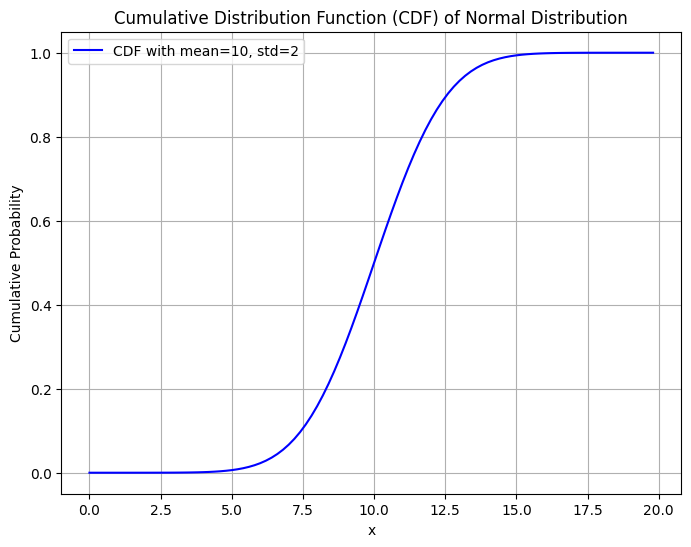

In [2]:
def draw_cdf(left_boundary, right_boundary):

    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(100)]

    cdf_values = [cdf_function(x) for x in x_values]  # Use cdf_function to get a single CDF value for each x

    # Plot the CDF
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, cdf_values, color='blue', label=f"CDF with mean={exp_values[0]}, std={std_values[0]}")
    plt.title("Cumulative Distribution Function (CDF) of Normal Distribution")
    plt.xlabel("x")
    plt.ylabel("Cumulative Probability")
    plt.legend()
    plt.grid(True)
    plt.show()



draw_cdf(left_boundary, right_boundary)
#cdf_function(10) #for testing if cdf function is giving expected results


### Exercise 3

#### части 1 и 2

In [3]:
def GetArg(F, minArg, maxArg, Value, eps):
    minVal= F(minArg)
    maxVal= F(maxArg)

    while abs((maxArg - minArg)/maxArg) > eps:
        midArg = (minArg + maxArg)/2
        midVal = F(midArg)

        if midVal > Value:
            maxArg = midArg
            maxVal = midVal
        else:
            minArg = midArg
            minVal = midVal
            
    return (minArg + maxArg)/2



def GetTabF(F, minArg, maxArg, PointsCount):
    # Calculate the range of the function
    minVal = F(minArg)
    maxVal = F(maxArg)

    # Calculate the step size for dividing the CDF range
    dVal = (maxVal - minVal) / (PointsCount - 2)

    # Initialize lists to store XTab and YTab
    YTab = [minVal]
    XTab = [minArg]
    
    # Loop to populate intermediate points
    for i in range(1, PointsCount - 1):
        YTab_i = minVal + dVal * i  # Calculate the YTab value
        XTab_i = GetArg(F, minArg, maxArg, YTab_i, 10**-15)  # Find the corresponding XTab value

        YTab.append(YTab_i)
        XTab.append(XTab_i)
    
    YTab.append(maxVal) # YTab[PointsCount-1]= maxVal
    XTab.append(maxArg) # XTab[PointsCount-1]= maxArg

    print(f"YTab={YTab}")
    print(f"XTab={XTab}")

    
    return XTab, YTab


#### часть 3

YTab=[2.8665164083039876e-07, 0.01010129096170939, 0.02020229527177795, 0.03030329958184651, 0.04040430389191507, 0.05050530820198363, 0.060606312512052195, 0.07070731682212074, 0.0808083211321893, 0.09090932544225787, 0.10101032975232642, 0.11111133406239498, 0.12121233837246355, 0.1313133426825321, 0.14141434699260066, 0.15151535130266924, 0.1616163556127378, 0.17171735992280635, 0.18181836423287492, 0.19191936854294347, 0.20202037285301203, 0.2121213771630806, 0.22222238147314916, 0.2323233857832177, 0.24242439009328628, 0.2525253944033548, 0.26262639871342336, 0.2727274030234919, 0.28282840733356046, 0.29292941164362907, 0.3030304159536976, 0.31313142026376617, 0.3232324245738347, 0.33333342888390327, 0.3434344331939718, 0.3535354375040404, 0.363636441814109, 0.37373744612417753, 0.3838384504342461, 0.39393945474431463, 0.4040404590543832, 0.41414146336445173, 0.42424246767452034, 0.4343434719845889, 0.44444447629465744, 0.454545480604726, 0.46464648491479454, 0.4747474892248631, 0

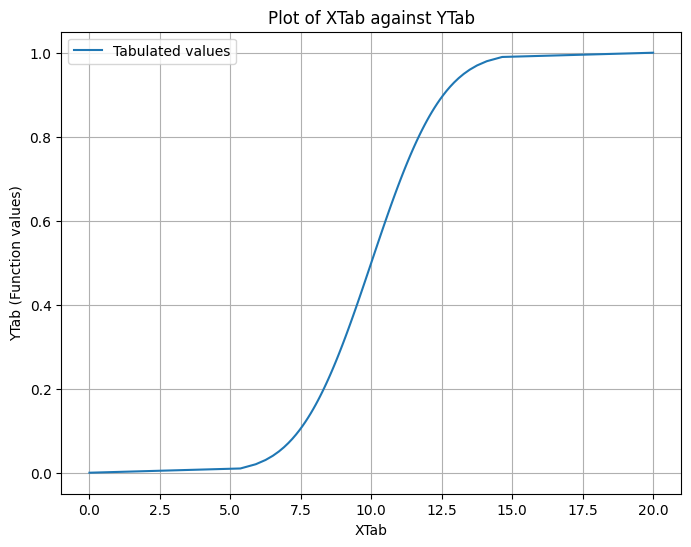

In [4]:
expectation= 10
std=2


# Get the tabulated data
minArg = expectation - 10
maxArg = expectation + 10
TabSize = 101

 # Get the XTab and YTab values
XTab, YTab = GetTabF(cdf_function, minArg, maxArg, TabSize)

def plot_xtab_ytab(XTab, YTab):
   
    plt.figure(figsize=(8, 6))
    plt.plot(XTab, YTab, label="Tabulated values")
    
    plt.title("Plot of XTab against YTab")
    plt.xlabel("XTab")
    plt.ylabel("YTab (Function values)")
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.show()

plot_xtab_ytab(XTab, YTab)



#### часть 4

In [5]:

def Model_N(XTab, YTab, p):
    for i in range(1, len(XTab)):
        if YTab[i-1] <= p <= YTab[i]:
            # Linear interpolation formula
            y = (
                XTab[i-1] * (p - YTab[i]) / (YTab[i-1] - YTab[i]) +
                XTab[i] * (p - YTab[i-1]) / (YTab[i] - YTab[i-1])
            )
            return y




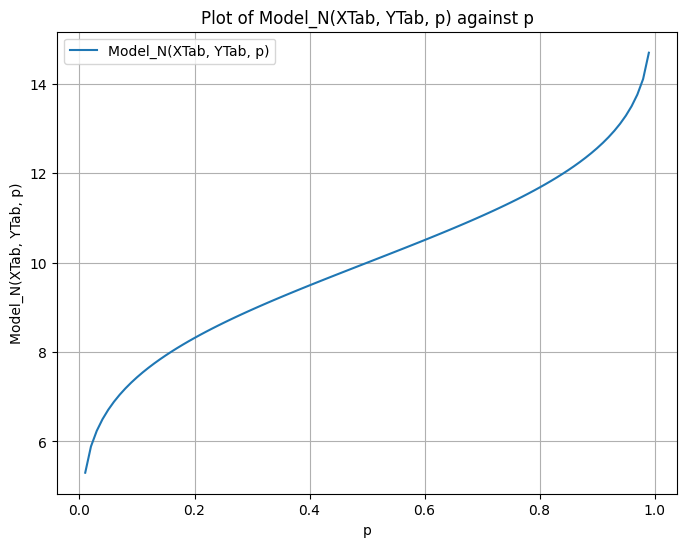

In [6]:
def plot_model_N(XTab, YTab):
    left_boundary = 0
    right_boundary = 1
    p_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(101)]

    # Compute Model_N for each p
    model_N_values = [Model_N(XTab, YTab, p) for p in p_values]

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(p_values, model_N_values, label="Model_N(XTab, YTab, p)")

    plt.title("Plot of Model_N(XTab, YTab, p) against p")
    plt.xlabel("p")
    plt.ylabel("Model_N(XTab, YTab, p)")

     # Adjust the legend location to the right of the plot
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend()
    plt.grid(True)
    plt.show()


plot_model_N(XTab, YTab)

#### часть 5

In [7]:
import random

random.seed(42)

# Define the different n values
n_values = [10**3, 10**4, 10**5, 10**6]

# Dictionary to store results for each n
ParArr_results = {}

for n in n_values:
    p_values = [random.uniform(0, 1) for _ in range(n)]  # Generate random p values

    
    # def random_close_to_mean(n, mean=10, std_dev=2, samples=12):
    #     p_values = []
    #     for _ in range(n):
    #         # Generate the sum of 'samples' uniform random variables
    #         uniform_sum = sum(random.uniform(0, 1) for _ in range(samples))
            
    #         # Rescale to approximate a normal distribution
    #         # Mean of uniform_sum is samples / 2, variance is samples / 12
    #         normalized = (uniform_sum - samples / 2) / (samples / 12)**0.5
            
    #         # Scale and shift to get the desired mean and standard deviation
    #         value = normalized * std_dev + mean
    #         p_values.append(value)
    #     return p_values
    

    # p_values = random_close_to_mean(n) 

    # Compute Model_N for each p and store in the dictionary
    ParArr_results[n] = [Model_N(XTab, YTab, p) for p in p_values]
    # ParArr_results[n] = p_values

    # Output statistics
    print(f"Results for n = {n}:")
    print(f"Length: {len(ParArr_results[n])}")
    #print(f"Series: {ParArr_results[n]}")
    print(f"Max: {max(ParArr_results[n])}")
    print(f"Min: {min(ParArr_results[n])}")
    print()


Results for n = 1000:
Length: 1000
Max: 19.95128884991675
Min: 0.21504990982376282

Results for n = 10000:
Length: 10000
Max: 19.94690150096102
Min: 0.018780012167988875

Results for n = 100000:
Length: 100000
Max: 19.99900892165724
Min: 0.0032419739961978694

Results for n = 1000000:
Length: 1000000
Max: 19.99958456359622
Min: 0.00011264193151201097



### Exercise 4

#### часть 1

In [8]:
def GetFreqDistr(RParamsArr, A, B, IntervalsCount):
    dY = (B-A)/IntervalsCount

    Freq = [0] * IntervalsCount

    for j in range(len(RParamsArr)):
        Yc= RParamsArr[j]

        if Yc < A or Yc > B:
            continue
        
        fN = math.floor((Yc - A) / dY)

        if 0 <= fN < IntervalsCount:  # Ensure the index is within bounds
            Freq[fN] += 1
        
    #Normalizing the frequency values
    for i in range(IntervalsCount): #normalizing all bins including the last one
        Freq[i] = Freq[i]/(len(RParamsArr)*dY)

    return Freq





#### часть 2

In [9]:
A = 0
B = 20
K = 100

resX_values=[]

for k in range(K):
    resX= ((B-A)/K)*(0.5 + k)
    resX_values.append(resX)

resY_e3= GetFreqDistr(ParArr_results[10**3], A, B, K)
resY_e4= GetFreqDistr(ParArr_results[10**4], A, B, K)
resY_e5= GetFreqDistr(ParArr_results[10**5], A, B, K)
resY_e6= GetFreqDistr(ParArr_results[10**6], A, B, K)

resY_list= [resY_e3, resY_e4, resY_e5, resY_e6]

print(resY_e4)
print(ParArr_results[10**4])
#print(resX_values)

[0.003, 0.0025, 0.0015, 0.0015, 0.0015, 0.001, 0.001, 0.0015, 0.0015, 0.0015, 0.0005, 0.0005, 0.002, 0.0035, 0.0015, 0.002, 0.0025, 0.0015, 0.0, 0.003, 0.003, 0.0025, 0.0035, 0.0015, 0.0025, 0.0025, 0.0065, 0.0125, 0.0135, 0.023, 0.0255, 0.036, 0.043, 0.049, 0.059, 0.0745, 0.0885, 0.1, 0.11, 0.125, 0.129, 0.136, 0.1215, 0.1535, 0.183, 0.1935, 0.195, 0.1915, 0.188, 0.201, 0.193, 0.1935, 0.195, 0.1875, 0.1835, 0.188, 0.1675, 0.148, 0.1465, 0.1285, 0.114, 0.1, 0.083, 0.0705, 0.066, 0.0555, 0.049, 0.037, 0.044, 0.0315, 0.023, 0.0155, 0.0165, 0.0075, 0.0045, 0.0025, 0.001, 0.001, 0.001, 0.001, 0.0035, 0.0015, 0.001, 0.0025, 0.0035, 0.002, 0.001, 0.0035, 0.0025, 0.0005, 0.002, 0.003, 0.0015, 0.0015, 0.0025, 0.0015, 0.001, 0.0005, 0.0025, 0.0005]
[7.42890834561906, 10.967325175319056, 10.223388351737919, 14.032114068920933, 9.275922197010974, 9.483626565036746, 8.242590214257753, 7.671247827114643, 12.056146805781564, 9.772495731178578, 10.840138395671985, 10.726103042653062, 10.4919511139904

Histogram and PDF for resY_e3


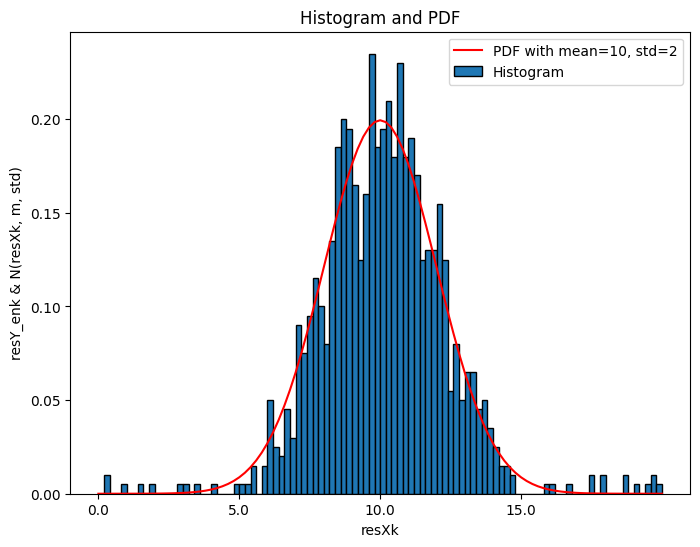

[0.1, 0.30000000000000004, 0.5, 0.7000000000000001, 0.9, 1.1, 1.3, 1.5, 1.7000000000000002, 1.9000000000000001]
[0.0, 0.01, 0.0, 0.0, 0.005, 0.0, 0.0, 0.005, 0.0, 0.005]
Histogram and PDF for resY_e4


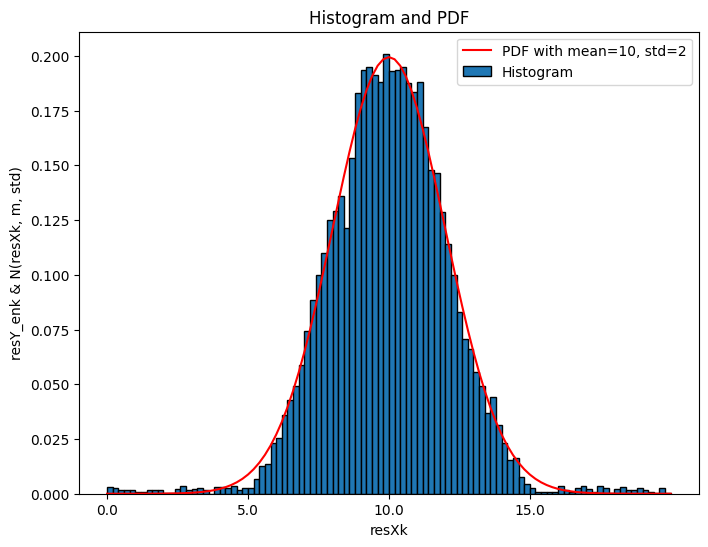

[0.1, 0.30000000000000004, 0.5, 0.7000000000000001, 0.9, 1.1, 1.3, 1.5, 1.7000000000000002, 1.9000000000000001]
[0.003, 0.0025, 0.0015, 0.0015, 0.0015, 0.001, 0.001, 0.0015, 0.0015, 0.0015]
Histogram and PDF for resY_e5


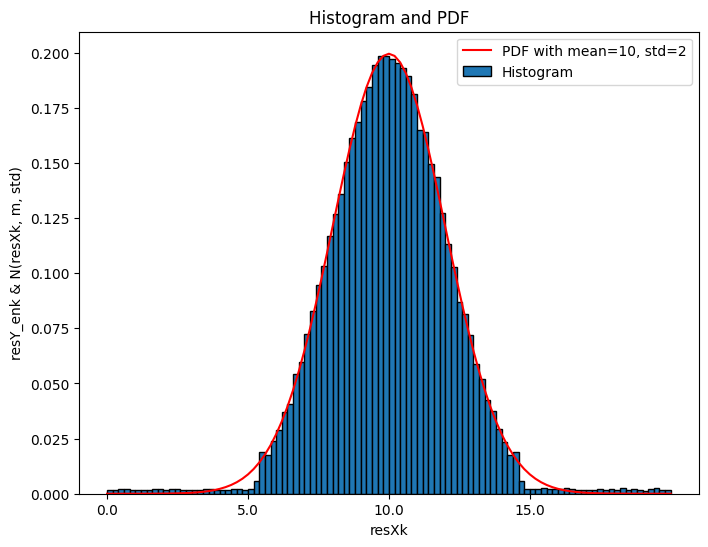

[0.1, 0.30000000000000004, 0.5, 0.7000000000000001, 0.9, 1.1, 1.3, 1.5, 1.7000000000000002, 1.9000000000000001]
[0.0016, 0.0018, 0.00195, 0.00225, 0.0015, 0.00185, 0.0016, 0.0019, 0.0022, 0.0022]
Histogram and PDF for resY_e6


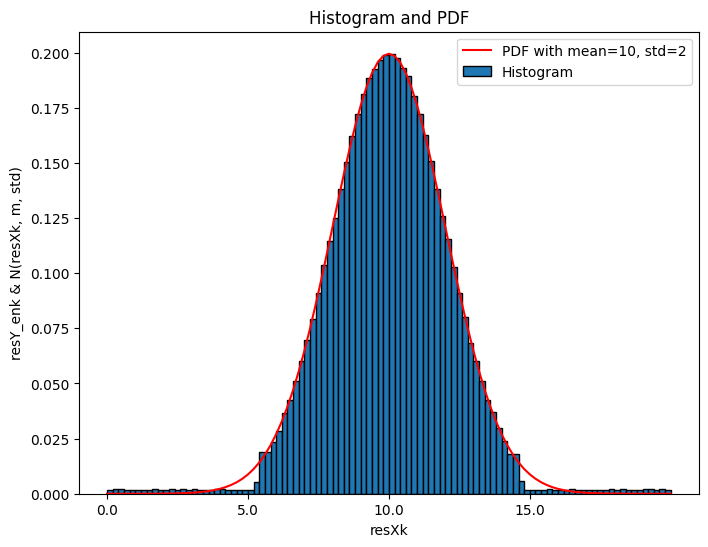

[0.1, 0.30000000000000004, 0.5, 0.7000000000000001, 0.9, 1.1, 1.3, 1.5, 1.7000000000000002, 1.9000000000000001]
[0.001755, 0.001935, 0.001945, 0.001885, 0.0019, 0.0019, 0.00183, 0.001865, 0.00195, 0.00181]


In [10]:
def draw_pdf_and_hist(left_boundary, right_boundary, num_plots, relative_frequencies, std=2, expectation=10):
    # Create the histogram plot
    plt.figure(figsize=(8, 6))

    bar_width = (right_boundary - left_boundary) / num_plots

    x_values = [left_boundary + i * (right_boundary - left_boundary) / 100 for i in range(101)] 
    y_values = [normal_dis_function(std, expectation, x) for x in x_values]
    plt.plot(x_values, y_values, label=f"PDF with mean={expectation}, std={std}", color='red')


    
     # Calculate the bin edges
    bins = [left_boundary + (i * (right_boundary - left_boundary) / num_plots) for i in range(num_plots + 1)]
    
    # Adjust the x positions to match the bins
    x_positions = [bins[i] for i in range(num_plots)]



    # Plot the bars with uniform width across the boundary range
    plt.bar(x_positions, relative_frequencies, width=bar_width, align='edge', edgecolor='black', 
            tick_label=[f'{bins[i]:.1f}' for i in range(len(bins)-1)], label="Histogram")
    
    
     # Set x-ticks every 5 units
    xticks = range(0, right_boundary, 5)  # Labels every 5 units
    plt.xticks(xticks)  # Set the x-ticks
        
    # Labeling the axes
    plt.title("Histogram and PDF")
    plt.xlabel("resXk")
    plt.ylabel("resY_enk & N(resXk, m, std)")
    plt.legend()

    

    # Show the plot
    plt.show()

# Example Usage
left_boundary = 0  
right_boundary = 20  



for n, resY in enumerate(resY_list, start=3):  # Enumerate starting from 3
    print(f"Histogram and PDF for resY_e{n}")
    draw_pdf_and_hist(left_boundary, right_boundary, K, resY)
    print(resX_values[:10:])
    print(resY[:10:])


#### часть 3

In [11]:
def std_hist(std, expectation, resY_no, K):
    std_values = []
    for i in range(K):
        const =  ((normal_dis_function(std, expectation, resX_values[i]) - resY_no[i])**2) / K
        std_values.append(const)
        
    return std_values

print(f"std for resY_e3[i] and N(resXi, m, std): {sum(std_hist(std, expectation, resY_e3,K))}")
print(f"std for resY_e4[i] and N(resXi, m, std): {sum(std_hist(std, expectation, resY_e4,K))}")
print(f"std for resY_e5[i] and N(resXi, m, std): {sum(std_hist(std, expectation, resY_e5,K))}")
print(f"std for resY_e6[i] and N(resXi, m, std): {sum(std_hist(std, expectation, resY_e6,K))}")

std for resY_e3[i] and N(resXi, m, std): 0.0002436633002902696
std for resY_e4[i] and N(resXi, m, std): 2.939542787837619e-05
std for resY_e5[i] and N(resXi, m, std): 6.658136439238723e-06
std for resY_e6[i] and N(resXi, m, std): 5.043162010184884e-06


#### часть 5

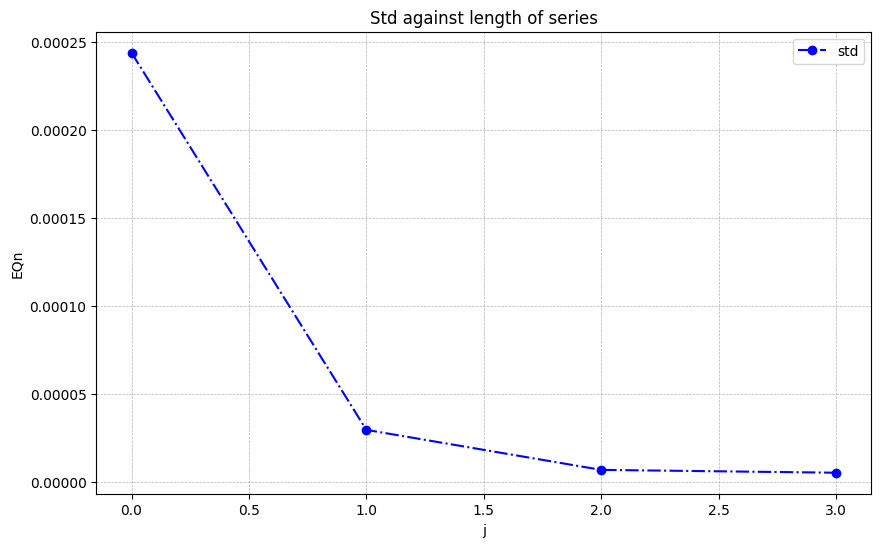

In [12]:
def draw_graph_std(len_series, std_values):
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(len_series, std_values, marker='o', linestyle='dashdot', label="std", color="blue")

    plt.xscale('linear')
    plt.yscale('linear')
    plt.xlabel('j')
    plt.ylabel('EQn')
    plt.title('Std against length of series')
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

len_Series = [0, 1, 2, 3]
std_values= [sum(std_hist(std, expectation, resY_e3,K)), sum(std_hist(std, expectation, resY_e4,K)), sum(std_hist(std, expectation, resY_e5,K)), sum(std_hist(std, expectation, resY_e6,K))]

draw_graph_std(len_Series, std_values)